#  Classification

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Importing the dataset

In [3]:
import pandas as pd


Train_df = pd.read_csv('H:\\ML\\Project\\Diabetes\\DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv')


## Train Test Split



In [4]:
from sklearn.model_selection import train_test_split

Train_df, Test_df = train_test_split(Train_df, test_size=0.25, random_state=0)


## Data Exploration


In [5]:
#finding the missing values
Train_df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

## Encoding Categorical Data (Independent Variables)


<Axes: >

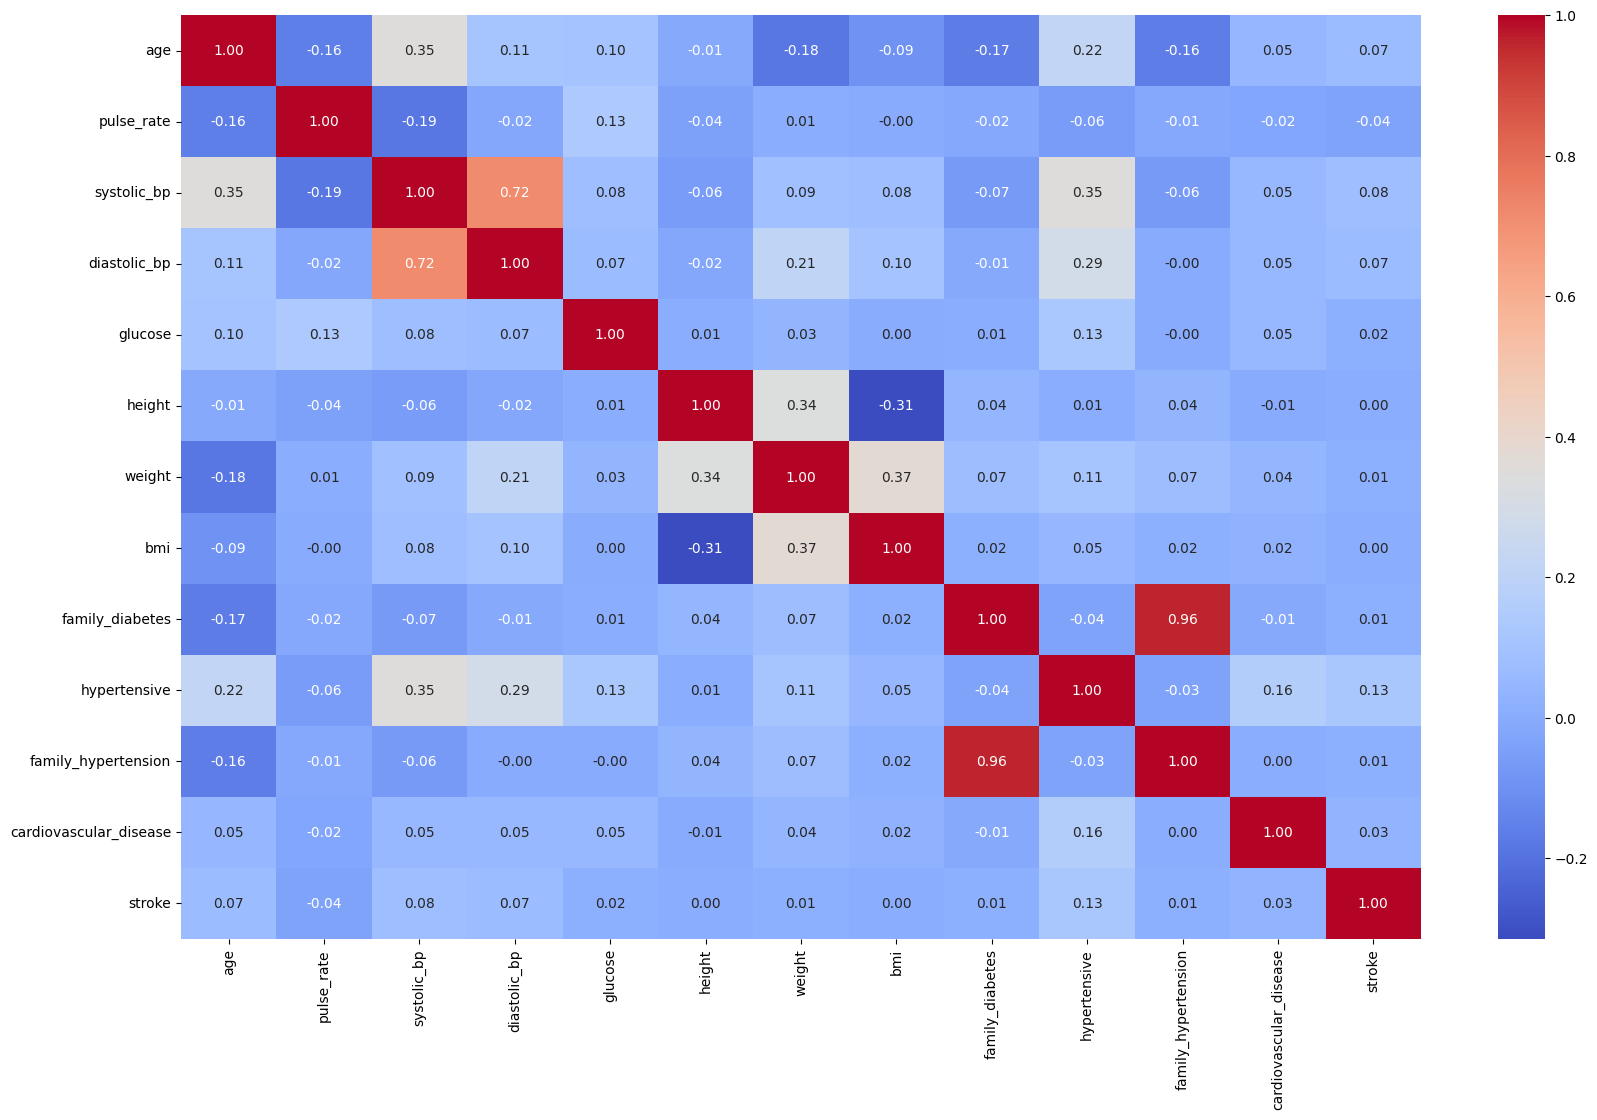

In [6]:
correlation_matrix = Train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot= True, cmap= 'coolwarm', fmt='0.2f')

In [7]:
# Display columns with object data type
object_columns = Train_df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'diabetic'], dtype='object')


In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3966 entries, 326 to 2732
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3966 non-null   int64  
 1   gender                  3966 non-null   object 
 2   pulse_rate              3966 non-null   int64  
 3   systolic_bp             3966 non-null   int64  
 4   diastolic_bp            3966 non-null   int64  
 5   glucose                 3966 non-null   float64
 6   height                  3966 non-null   float64
 7   weight                  3966 non-null   float64
 8   bmi                     3966 non-null   float64
 9   family_diabetes         3966 non-null   int64  
 10  hypertensive            3966 non-null   int64  
 11  family_hypertension     3966 non-null   int64  
 12  cardiovascular_disease  3966 non-null   int64  
 13  stroke                  3966 non-null   int64  
 14  diabetic                3966 non-null   obj

## Encoding Categorical Data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

Train_df[['gender', 'diabetic']] = ordinal_encoder.fit_transform(Train_df[['gender', 'diabetic']])
Test_df[['gender', 'diabetic']] = ordinal_encoder.fit_transform(Test_df[['gender', 'diabetic']])

In [10]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3966 entries, 326 to 2732
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3966 non-null   int64  
 1   gender                  3966 non-null   float64
 2   pulse_rate              3966 non-null   int64  
 3   systolic_bp             3966 non-null   int64  
 4   diastolic_bp            3966 non-null   int64  
 5   glucose                 3966 non-null   float64
 6   height                  3966 non-null   float64
 7   weight                  3966 non-null   float64
 8   bmi                     3966 non-null   float64
 9   family_diabetes         3966 non-null   int64  
 10  hypertensive            3966 non-null   int64  
 11  family_hypertension     3966 non-null   int64  
 12  cardiovascular_disease  3966 non-null   int64  
 13  stroke                  3966 non-null   int64  
 14  diabetic                3966 non-null   flo

In [11]:

print(Train_df.head())

      age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
326    67     1.0          51          143            93     6.24    1.70   
252    35     0.0          59          122            80     5.86    1.57   
4710   52     0.0          76          146            86     7.82    1.60   
1736   55     0.0          78          129            85     9.88    1.57   
1465   40     1.0          78          175            94     8.96    1.68   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
326     57.0  19.68                0             0                    0   
252     40.0  16.13                1             0                    1   
4710    43.6  17.03                0             0                    0   
1736    53.0  21.37                0             0                    0   
1465    57.3  20.39                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
326                        0       0 

## Splitting the dataset into the Training set and Test set

In [12]:
X_train = Train_df.drop(columns=['diabetic']).values
y_train = Train_df['diabetic'].values
X_test = Test_df.drop(columns=['diabetic']).values
y_test =Test_df['diabetic'].values

## Feature Scaling

In [13]:
scale = StandardScaler()
columns = Train_df.select_dtypes(include=['number']).columns.difference(['gender', 'diabetic'])
Train_df[columns] = scale.fit_transform(Train_df[columns])


##  Random Forest Classification 

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1234    9]
 [  66   13]]


0.943267776096823

## Kernel SVM

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_SVM = classifier.predict(X_test)
accuracy_score(y_test, y_pred_SVM)

0.9402420574886535

## KNN



In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred_KNN = classifier.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.9364599092284418

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_DT = classifier.predict(X_test)
accuracy_score(y_test, y_pred_DT)

0.916036308623298

## Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_GNB = classifier.predict(X_test)
accuracy_score(y_test, y_pred_GNB)

0.9009077155824509

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_LR = classifier.predict(X_test)
accuracy_score(y_test, y_pred_LR)

h:\ML\Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9455370650529501